# Assignment 4

## Clustering Methods

#### Submitted by Shivani Naik

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_regression
%matplotlib inline

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=["Sepal Length", "Sepal Width",
                                          "Petal Length", "Petal Width",
                                          "Name"])

In [3]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Fit a label encoder to convert name to int
le = LabelEncoder()
name_num = le.fit_transform(df['Name'])
name_num

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 1.1.1 Plotting scatter matrix

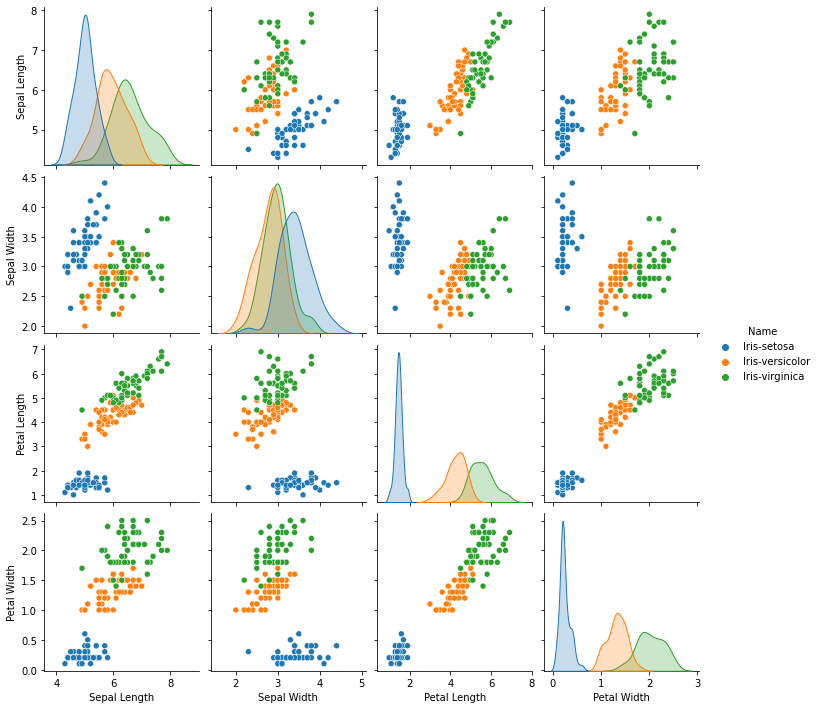

In [5]:
#plotting using seaborn
sns.pairplot(data=df, hue = "Name")

<b>Observations</b>
* The classes are not equally well separated, Setosa class is more separated from the other 2 classes
* There is some overlap between Versicolor and Virginica

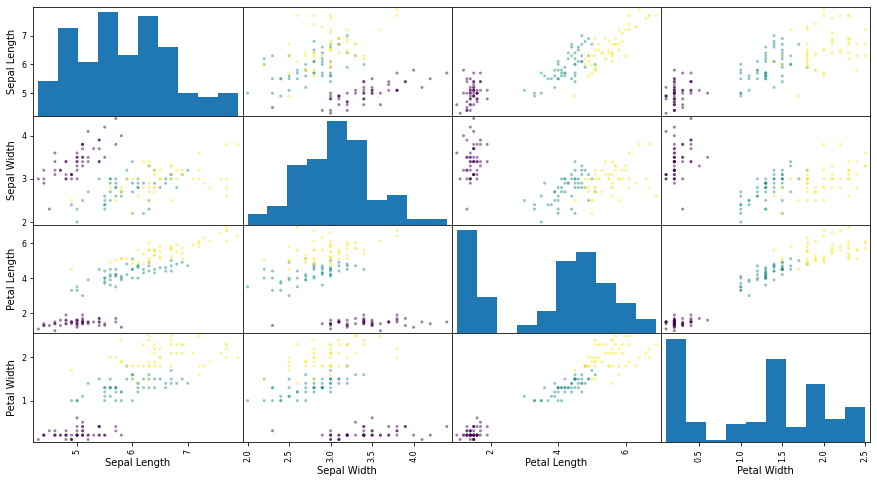

In [6]:
#plotting using pandas
pd.plotting.scatter_matrix(df.iloc[:,0:4], figsize=(15,8), c = name_num);

### 1.1.2 K-means Clustering

In [7]:
X = df.iloc[:,:4].values
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster'] = kmeans.labels_
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


Text(0.5, 1.0, 'Kmeans clustering with k=3')

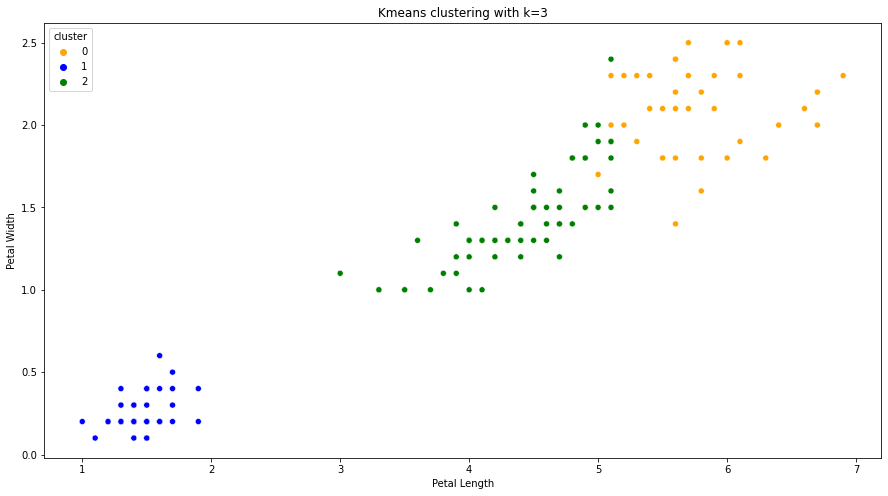

In [8]:
plt.figure(figsize = (15,8))
sns.scatterplot(data = df, x = "Petal Length", y = "Petal Width", hue="cluster",
                palette=["orange","blue","green"] );
plt.title("Kmeans clustering with k=3")

### 1.1.3 Cross tabulation

In [9]:
pd.crosstab(df['Name'],df['cluster'])

cluster,0,1,2
Name,,,
Iris-setosa,0,50,0
Iris-versicolor,2,0,48
Iris-virginica,36,0,14


<b>Observations</b>
* 2 + 14 = 16 points belong to incorrect clusters. This is between Versicolor and Virginica, as observed from scatter plots, they were very close to each other
* Cluster 1 corresponds completely to Setosa class, which means all of the points from Setosa were mapped to this cluster
* This is inline with observations from scatter plots. The scatter plots showed Setosa class was highly separated from other 2 classes with no overlap, thus it was clustered properly whereas there is some overlap betweeb Versicolor and Virginica as they are close to each other


In [10]:
df.iloc[:,:4]

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Hierarchical Clustering

### 1.2.1 Mutual Information Matrix

Let us calculate mutual information using select k best and mutual information regression. We will check this with 2 scenarios:
* Calculating mutual information of feature with itself (diagonal elements)
* Manually setting values for diagonal elements

In [12]:
features = df.columns[:4].to_list()
features

['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

In [51]:
#Function to calculate mutual information matrix. 'itself' parameter corresponds to if we want to calculate MI 
#of a feature with itself
def generate_mutual_info_matrix(itself = True):
    np.random.seed(150)
    result_list = []
    for y_col in features:
        X_cols = features.copy()
        if itself == False:
            X_cols.remove(y_col)
        
        fs = SelectKBest(score_func=mutual_info_regression, k='all')
        fs.fit(df[X_cols].values, df[y_col].values)

        res = pd.DataFrame({ 'feature1':y_col,
                        'feature2':X_cols,
                        'score':fs.scores_})
        result_list.append(res)
    
    mutual_info_df = pd.concat(result_list).reset_index(drop = True)
    mutual_info_pivot = mutual_info_df.pivot(index = "feature1", columns="feature2",values = "score")

    return(mutual_info_pivot)

In [52]:
mutual_info_pivot = generate_mutual_info_matrix()
mutual_info_pivot

feature2,Petal Length,Petal Width,Sepal Length,Sepal Width
feature1,,,,
Petal Length,3.131188,1.186006,0.863734,0.331204
Petal Width,1.219194,2.741286,0.606461,0.414221
Sepal Length,0.861766,0.620924,3.218792,0.305676
Sepal Width,0.352120,0.390334,0.304149,2.679427


### 1.2.2 Hierarchical Clustering

In [53]:
hierarchical = AgglomerativeClustering()
hierarchical.fit(mutual_info_pivot)

AgglomerativeClustering()

Text(0.5, 1.0, 'Hierarchical Clustering')

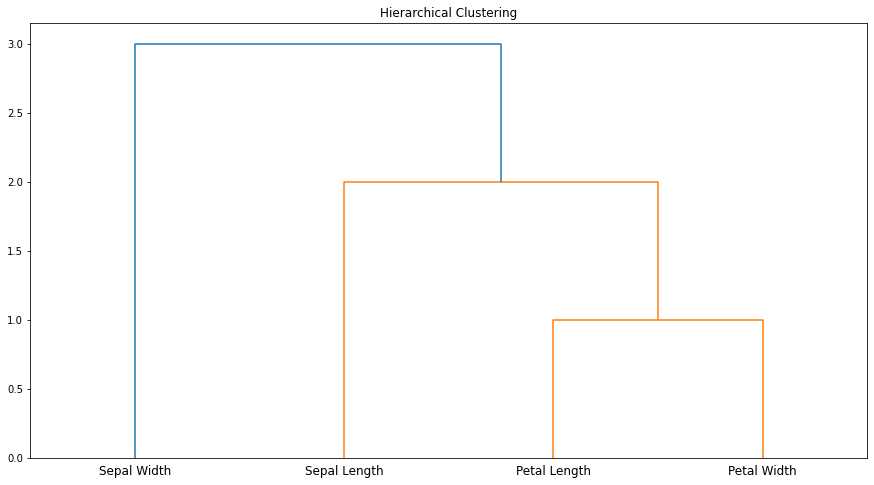

In [54]:

def plot_dendrogram(model, **kwargs):
    children = model.children_
    dist = np.arange(children.shape[0])+1
    n_obs = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, dist, n_obs])
    dendrogram(linkage_matrix.astype(float), **kwargs)

plt.figure(figsize=(15,8))
plot_dendrogram(hierarchical, labels = mutual_info_pivot.index.values)
plt.title("Hierarchical Clustering")

<b>Observations</b>
* Petal Length and Petal Width are most similar to each other
* Sepal Width feature is most unlike others
* This result depends on diagonal elements of the matrix, let us check with diagonal manually set to 0

In [55]:
mutual_info_pivot = generate_mutual_info_matrix(itself=False)
mutual_info_pivot = mutual_info_pivot.fillna(0)
mutual_info_pivot

feature2,Petal Length,Petal Width,Sepal Length,Sepal Width
feature1,,,,
Petal Length,0.000000,1.216267,0.900722,0.353870
Petal Width,1.225509,0.000000,0.673601,0.435072
Sepal Length,0.882626,0.614250,0.000000,0.312321
Sepal Width,0.369814,0.403813,0.280903,0.000000


Text(0.5, 1.0, 'Hierarchical Clustering')

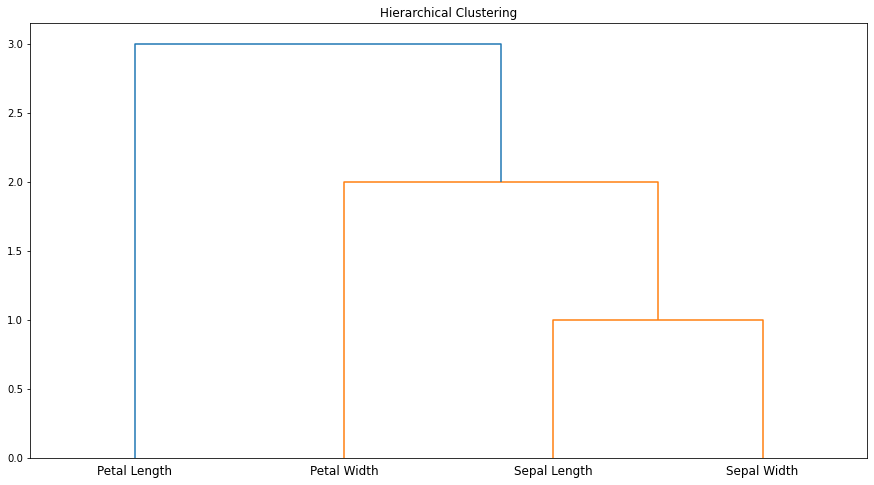

In [56]:
hierarchical.fit(mutual_info_pivot)
plt.figure(figsize=(15,8))
plot_dendrogram(hierarchical, labels = mutual_info_pivot.index.values)
plt.title("Hierarchical Clustering")

<b>Observations</b>
* This result depends on diagonal elements of the matrix which we set to 0 (mutual information of a feature with itself)
* Sepal Length and Sepal Width are most similar to each other
* Petal length feature is most unlike others
* The difference in 2 clusterings is because these values will decide the distance between 2 points, and changing them changes the distance, which ultimately results in different clusters

Let us check by setting diagonal elements to 1

In [57]:
mutual_info_pivot = generate_mutual_info_matrix(itself=False)
mutual_info_pivot = mutual_info_pivot.fillna(1)
mutual_info_pivot

feature2,Petal Length,Petal Width,Sepal Length,Sepal Width
feature1,,,,
Petal Length,1.000000,1.216267,0.900722,0.353870
Petal Width,1.225509,1.000000,0.673601,0.435072
Sepal Length,0.882626,0.614250,1.000000,0.312321
Sepal Width,0.369814,0.403813,0.280903,1.000000


Text(0.5, 1.0, 'Hierarchical Clustering')

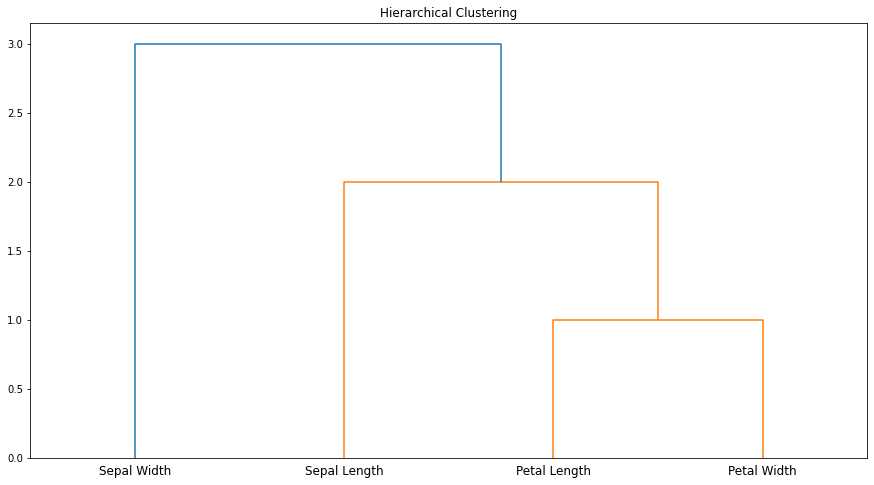

In [58]:
hierarchical.fit(mutual_info_pivot)
plt.figure(figsize=(15,8))
plot_dendrogram(hierarchical, labels = mutual_info_pivot.index.values)
plt.title("Hierarchical Clustering")

<b>Observations</b>
* This result depends on diagonal elements of the matrix which we set to 1 (mutual information of a feature with itself)
* It is similar to the first clustering. Petal length and petal width are most similar. 
* Sepal width is most unlike other features